In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# suppress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [35]:
df = pd.read_csv(r'C:\data\mia_data2.csv')

In [36]:
df.keys()

Index(['Unnamed: 0.1', 'Unnamed: 0', 'YEAR', 'MONTH', 'DAY_OF_WEEK',
       'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'DEP_TIME',
       'DEP_DELAY', 'DEP_DELAY_NEW', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'ARR_DELAY_NEW', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED',
       'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WHY_DELAY', 'DAY', 'DATE'],
      dtype='object')

In [37]:
# Deleting all flights were the flight was diverted
df = df[df.DIVERTED ==0]

In [38]:
#Deleting all rows where the flight was cancelled
df = df[df.CANCELLED == 0]


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 659119 entries, 0 to 736651
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0.1         659119 non-null  int64  
 1   Unnamed: 0           659119 non-null  int64  
 2   YEAR                 659119 non-null  int64  
 3   MONTH                659119 non-null  int64  
 4   DAY_OF_WEEK          659119 non-null  float64
 5   OP_CARRIER_FL_NUM    659119 non-null  int64  
 6   ORIGIN               659119 non-null  object 
 7   DEST                 659119 non-null  object 
 8   CRS_DEP_TIME         659119 non-null  int64  
 9   DEP_TIME             659119 non-null  float64
 10  DEP_DELAY            659119 non-null  float64
 11  DEP_DELAY_NEW        659119 non-null  float64
 12  CRS_ARR_TIME         659119 non-null  int64  
 13  ARR_TIME             659119 non-null  float64
 14  ARR_DELAY            659119 non-null  float64
 15  ARR_DELAY_NEW    

In [40]:
# I want to create dummy values based on the why delay column
dummy = pd.get_dummies(df['WHY_DELAY'])

In [41]:
dummy

,0,carrier,late aircraft,nas,security,weather
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
736647,1,0,0,0,0,0
736648,1,0,0,0,0,0
736649,1,0,0,0,0,0
736650,0,0,0,1,0,0


In [42]:
df = pd.concat([df, dummy], axis = 1)
df.keys()

Index(['Unnamed: 0.1', 'Unnamed: 0', 'YEAR', 'MONTH', 'DAY_OF_WEEK',
       'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'DEP_TIME',
       'DEP_DELAY', 'DEP_DELAY_NEW', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'ARR_DELAY_NEW', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED',
       'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WHY_DELAY', 'DAY', 'DATE', '0', 'carrier', 'late aircraft', 'nas',
       'security', 'weather'],
      dtype='object')

In [43]:
df.drop(columns = ['Unnamed: 0.1', 'Unnamed: 0', 'OP_CARRIER_FL_NUM', 'CANCELLATION_CODE', 'DIVERTED',  'CARRIER_DELAY','WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'DATE', 'WHY_DELAY', 'carrier', 'late aircraft', 'nas','security', 'OP_CARRIER_FL_NUM', 'CANCELLED']  , inplace = True)

In [44]:
df.head()

,YEAR,MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DAY,0,weather
0,2010,5,6.0,STT,MIA,1535,1519.0,-16.0,0.0,1840,1835.0,-5.0,0.0,185.0,196.0,1,1,0
1,2010,5,7.0,STT,MIA,1535,1550.0,15.0,15.0,1840,1840.0,0.0,0.0,185.0,170.0,2,1,0
2,2010,5,1.0,STT,MIA,1535,1550.0,15.0,15.0,1840,1846.0,6.0,6.0,185.0,176.0,3,1,0
3,2010,5,2.0,STT,MIA,1535,1533.0,-2.0,0.0,1840,1829.0,-11.0,0.0,185.0,176.0,4,1,0
4,2010,5,3.0,STT,MIA,1535,1557.0,22.0,22.0,1840,1848.0,8.0,8.0,185.0,171.0,5,1,0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 659119 entries, 0 to 736651
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 659119 non-null  int64  
 1   MONTH                659119 non-null  int64  
 2   DAY_OF_WEEK          659119 non-null  float64
 3   ORIGIN               659119 non-null  object 
 4   DEST                 659119 non-null  object 
 5   CRS_DEP_TIME         659119 non-null  int64  
 6   DEP_TIME             659119 non-null  float64
 7   DEP_DELAY            659119 non-null  float64
 8   DEP_DELAY_NEW        659119 non-null  float64
 9   CRS_ARR_TIME         659119 non-null  int64  
 10  ARR_TIME             659119 non-null  float64
 11  ARR_DELAY            659119 non-null  float64
 12  ARR_DELAY_NEW        659119 non-null  float64
 13  CRS_ELAPSED_TIME     659119 non-null  float64
 14  ACTUAL_ELAPSED_TIME  659119 non-null  float64
 15  DAY              

In [46]:
# Due to the size and complexity of the data set, I am only going to focus on arrivals for the time being.
df_arr = df[df.DEST == 'MIA']


In [47]:
df_arr.keys()

Index(['YEAR', 'MONTH', 'DAY_OF_WEEK', 'ORIGIN', 'DEST', 'CRS_DEP_TIME',
       'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW', 'CRS_ARR_TIME', 'ARR_TIME',
       'ARR_DELAY', 'ARR_DELAY_NEW', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME',
       'DAY', '0', 'weather'],
      dtype='object')

In [48]:
# In df_ arr, the DEST value is the same for all flights, I will be eliminating that column as well as everything that has to 
# deal with departures.

df_arr.drop(columns = ['CRS_DEP_TIME','DEST', 'DEP_DELAY_NEW', 'DEP_TIME', 'DEP_DELAY'], inplace = True)




C:\Users\Fernando Araiza\AppData\Local\Temp\ipykernel_5232\324790782.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_arr.drop(columns = ['CRS_DEP_TIME','DEST', 'DEP_DELAY_NEW', 'DEP_TIME', 'DEP_DELAY'], inplace = True)


In [49]:
# Converting Origin to numerical data by using get_dummies for arrivals
temp = pd.get_dummies(df_arr.ORIGIN, prefix = 'ORIGIN')



In [50]:
temp

,ORIGIN_ATL,ORIGIN_AUS,ORIGIN_BDL,ORIGIN_BGR,ORIGIN_BHM,ORIGIN_BNA,ORIGIN_BOS,ORIGIN_BWI,ORIGIN_CAE,ORIGIN_CHS,...,ORIGIN_SLC,ORIGIN_STL,ORIGIN_STT,ORIGIN_STX,ORIGIN_TLH,ORIGIN_TPA,ORIGIN_TTN,ORIGIN_TUL,ORIGIN_TYS,ORIGIN_XNA
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736642,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
736644,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
736645,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
736647,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
#Join the two dataframes
df_arr = pd.concat([df_arr, temp], axis = 1)

In [53]:
# Creating y for arrivals and dropping weather and origin column for df_arr
y_arr = df_arr['weather']

In [54]:
df_arr.drop(columns = ['weather', 'ORIGIN'], inplace = True)

In [55]:
df_arr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 329362 entries, 0 to 736648
Data columns (total 86 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 329362 non-null  int64  
 1   MONTH                329362 non-null  int64  
 2   DAY_OF_WEEK          329362 non-null  float64
 3   CRS_ARR_TIME         329362 non-null  int64  
 4   ARR_TIME             329362 non-null  float64
 5   ARR_DELAY            329362 non-null  float64
 6   ARR_DELAY_NEW        329362 non-null  float64
 7   CRS_ELAPSED_TIME     329362 non-null  float64
 8   ACTUAL_ELAPSED_TIME  329362 non-null  float64
 9   DAY                  329362 non-null  int64  
 10  0                    329362 non-null  uint8  
 11  ORIGIN_ATL           329362 non-null  uint8  
 12  ORIGIN_AUS           329362 non-null  uint8  
 13  ORIGIN_BDL           329362 non-null  uint8  
 14  ORIGIN_BGR           329362 non-null  uint8  
 15  ORIGIN_BHM       

In [123]:
# Split train, test for df_arrival
X_arr_train, X_arr_test, y_arr_train, y_arr_test = train_test_split(df_arr, y_arr, test_size = .33, random_state = 42)

In [124]:
#Function to implement SMOTE
def create_smote(X_arr_train, y_arr_train):
    from imblearn.over_sampling import SMOTE
    sm = SMOTE(random_state = 42, sampling_strategy = 1.0)
    X_train, y_train = sm.fit_resample(X_arr_train, y_arr_train)
    return [X_train, y_train]


In [121]:
smoted = create_smote(X_arr_train, y_arr_train)
X_arr_train = smoted[0] 
y_arr_train = smoted[1]

ValueError: The specified ratio required to remove samples from the minority class while trying to generate new samples. Please increase the ratio.

In [97]:
# These functions are to interpret and print the results of the maching learning algorithms. 
#There are two functions, one for that had iterable parameter thus had multiple results and the other for those who didn't
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
import seaborn as sns

#A dictionary will be used to save all the results from the different algorithms for analysis later on.
t_results = {}
def testing_results(test_name, y_test, y_pred, t_results):    
   
    
    acc_score = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    ROC =  roc_auc_score(y_test, y_pred)
    
    print(f'Accuracy score with {test_name} is {acc_score}.')
    print(f'Classification report for {test_name} is \n {class_report}.')
    print(f'Confusion matrix for {test_name} is \n {conf_matrix}.')   
    print(f'ROC-AUC score is {ROC}.')
    t_results[test_name] = [acc_score, class_report, conf_matrix, ROC]
    return t_results
    
def iterable_testing_results(test_name, y_test, array, t_results) :
    trinket = {}
    for item in array.items():
        trinket[item[0]] = accuracy_score(y_test, item[1])
    max_score = max(trinket.values())
    best_n = max(trinket, key=trinket.get)
    
    acc_score = accuracy_score(y_test, array[best_n])
    class_report = classification_report(y_arr_test, array[best_n])
    conf_matrix = confusion_matrix(y_arr_test, array[best_n])
    ROC =  roc_auc_score(y_test, array[best_n])
    print(best_n)
    print(f'{best_n} makes the best n value with a score of {max_score}.')
    print(f'Classification report for {test_name} \n {class_report}.')
    print(f'Confusion Matrix for {test_name} is \n {conf_matrix}.')
    print(f'ROC-AUC score is {ROC}.')
    t_results[test_name] = [acc_score, class_report, conf_matrix, ROC]
    return t_results


In [62]:
# Logistic Regression
def Logistic_Regression(X_train, y_train, X_test):
    from sklearn.linear_model import LogisticRegression
    c_range = [0.001,0.01,0.1,1,10,100]
    results = {}
    for c in c_range:
        lgreg = LogisticRegression(C = c, class_weight = {0:.91, 1:.09})
        lgreg.fit(X_arr_train, y_arr_train)
        predlgreg = lgreg.predict(X_arr_test)
        results[c] = predlgreg
    return results    


In [63]:
# Arrival Logistic Regression
lg_score = Logistic_Regression(X_arr_train, y_arr_train, X_arr_test)

In [64]:
t_arr_results_0 = iterable_testing_results('Logistic Regression', y_arr_test, lg_score, t_results)

0.001
0.001 makes the best n value with a score of 0.9769159996319808.
Classification report for Logistic Regression 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    107087
           1       0.17      0.14      0.15      1603

    accuracy                           0.98    108690
   macro avg       0.58      0.57      0.57    108690
weighted avg       0.98      0.98      0.98    108690
.
Confusion Matrix for Logistic Regression is 
 [[105955   1132]
 [  1377    226]].
ROC-AUC score is 0.5652074038179357.


In [104]:
# Random Forest Classifier
def Random_Forest(X_train, y_train, X_test):
    from sklearn.ensemble import RandomForestClassifier
    
    rf=RandomForestClassifier(max_depth = 5, n_estimators=100, random_state = 42)
    rf.fit(X_train, y_train)
    rf_y_pred = rf.predict(X_test)
    return [rf_y_pred, rf] 



In [105]:
#Arrival Random Forest
rf_results = Random_Forest(X_arr_train, y_arr_train, X_arr_test)

In [109]:
t_arr_results_1 = testing_results('Random Forest Classifier', y_arr_test, rf_results[0], t_results)

Accuracy score with Random Forest Classifier is 0.8323580826202962.
Classification report for Random Forest Classifier is 
               precision    recall  f1-score   support

           0       1.00      0.83      0.91    107087
           1       0.08      0.98      0.15      1603

    accuracy                           0.83    108690
   macro avg       0.54      0.90      0.53    108690
weighted avg       0.99      0.83      0.90    108690
.
Confusion matrix for Random Forest Classifier is 
 [[88904 18183]
 [   38  1565]].
ROC-AUC score is 0.9032489636620514.


In [75]:
# Decision Tree Classifier
def Decision_Tree_Classifier(X_train, y_train, X_test):
    from sklearn.tree import DecisionTreeClassifier
    DTC = DecisionTreeClassifier(criterion = 'gini', random_state = 42, max_depth = 3, min_samples_leaf=5)
    DTC.fit(X_train, y_train)
    DTC_y_predict = DTC.predict(X_test)
    return DTC_y_predict


In [76]:
DTC_y_predict = Decision_Tree_Classifier(X_arr_train, y_arr_train, X_arr_test)

In [77]:
t_arr_results_2 = testing_results('Decision Tree Classifier', y_arr_test, DTC_y_predict, t_arr_results_1)

Accuracy score with Decision Tree Classifier is 0.8612935872665378.
Classification report for Decision Tree Classifier is 
               precision    recall  f1-score   support

           0       1.00      0.86      0.92    107087
           1       0.08      0.78      0.14      1603

    accuracy                           0.86    108690
   macro avg       0.54      0.82      0.53    108690
weighted avg       0.98      0.86      0.91    108690
.
Confusion matrix for Decision Tree Classifier is 
 [[92361 14726]
 [  350  1253]].
ROC-AUC score is 0.8220725155806264.


In [78]:
# Naive Bayes Gaussian NB
def NBG (X_train, y_train, X_test):
    from sklearn.naive_bayes import GaussianNB
    gaussian = GaussianNB()
    gaussian.fit(X_train, y_train)
    gaus_pred = gaussian.predict(X_test)
    return gaus_pred

In [79]:
gaus_pred = NBG(X_arr_train, y_arr_train, X_arr_test)

In [80]:
t_arr_results_3 = testing_results('Naive Bayes Gaussian', y_arr_test, gaus_pred, t_arr_results_2)

Accuracy score with Naive Bayes Gaussian is 0.903247768883982.
Classification report for Naive Bayes Gaussian is 
               precision    recall  f1-score   support

           0       1.00      0.91      0.95    107087
           1       0.10      0.72      0.18      1603

    accuracy                           0.90    108690
   macro avg       0.55      0.81      0.56    108690
weighted avg       0.98      0.90      0.94    108690
.
Confusion matrix for Naive Bayes Gaussian is 
 [[97027 10060]
 [  456  1147]].
ROC-AUC score is 0.8107955331659048.


In [81]:
# Gradient Boosting
def Grad_Boosting(X_train, y_train, X_test):
    from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
    gbc = GradientBoostingClassifier(subsample=0.8, learning_rate=0.05 , n_estimators=160, random_state=5, max_depth=9, max_leaf_nodes=100)
    gbc.fit(X_arr_train, y_arr_train)

    #Predict using the model:

    y_predict_gbc = gbc.predict(X_arr_test)
    return  y_predict_gbc

In [82]:
y_predict_gbc = Grad_Boosting(X_arr_train, y_arr_train, X_arr_test)

In [83]:
t_arr_results_4 = testing_results('Gradient Boosting', y_arr_test, y_predict_gbc, t_arr_results_3)

Accuracy score with Gradient Boosting is 0.9666114637961174.
Classification report for Gradient Boosting is 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98    107087
           1       0.19      0.38      0.25      1603

    accuracy                           0.97    108690
   macro avg       0.59      0.68      0.62    108690
weighted avg       0.98      0.97      0.97    108690
.
Confusion matrix for Gradient Boosting is 
 [[104456   2631]
 [   998    605]].
ROC-AUC score is 0.6764242669719965.


In [30]:
# KNeighbor Classifier
def knn(X_train,y_train, X_test):
    from sklearn.neighbors import KNeighborsClassifier
    score = {}
    for n in range (1,10):
        knn = KNeighborsClassifier(n_neighbors = (n), weights = 'distance')
        knn.fit(X_train,y_train)
        y_pred_class = knn.predict(X_test)
        score[n] = y_pred_class
    
    return score


In [31]:
knn_score = knn(X_arr_train, y_arr_train, X_arr_test)


In [85]:
t_arr_results_5 = iterable_testing_results('K Neighbor', y_arr_test, knn_score, t_arr_results_4)

1
1 makes the best n value with a score of 0.9572361762811666.
Classification report for K Neighbor 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98    107087
           1       0.13      0.34      0.19      1603

    accuracy                           0.96    108690
   macro avg       0.56      0.66      0.58    108690
weighted avg       0.98      0.96      0.97    108690
.
Confusion Matrix for K Neighbor is 
 [[103491   3596]
 [  1052    551]].
ROC-AUC score is 0.6550751660861497.


# Machine Learning Analysis

In [86]:
# t_results[test_name] = [acc_score, class_report, conf_matrix, ROC]
t_results = t_arr_results_1
ml = list(t_results.keys())
result_values = list(t_results.values())
acc_scores_analysis = []
class_report_analysis = []
conf_matrix_analysis = []
ROC_analysis= []
for lists in result_values:
    acc_scores_analysis.append(lists[0])
    class_report_analysis.append(lists[1])
    conf_matrix_analysis.append(lists[2])
    ROC_analysis.append(lists[3])




<function matplotlib.pyplot.show(close=None, block=None)>

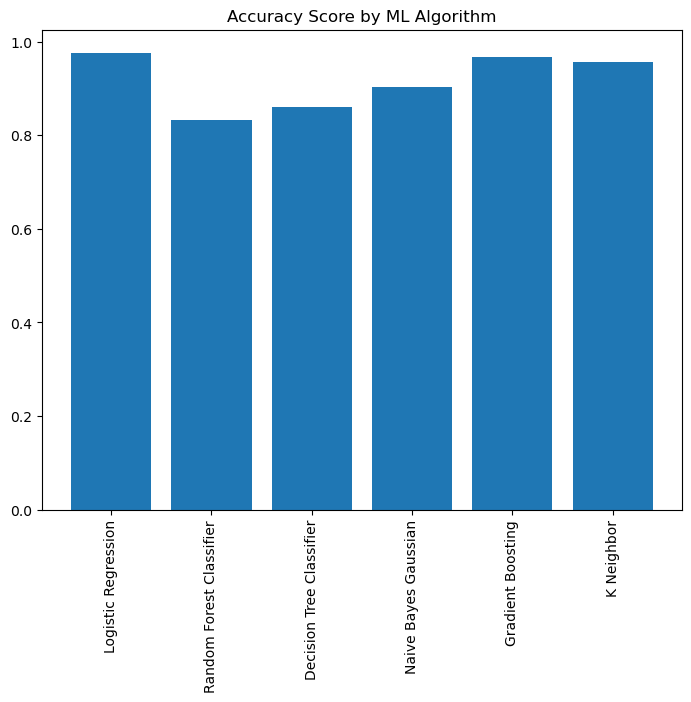

In [87]:

# Create a graph to compare the accuracy of each model
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ml, acc_scores_analysis)
plt.setp(ax.get_xticklabels(), rotation = 'vertical')
plt.title('Accuracy Score by ML Algorithm')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

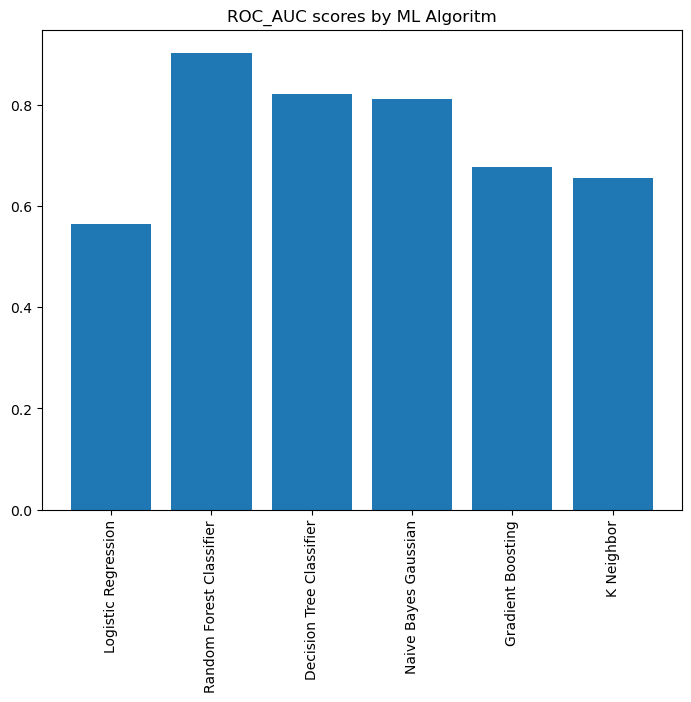

In [88]:
# Bar graph of ROC_AUC scores
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ml, ROC_analysis)
plt.setp(ax.get_xticklabels(), rotation = 'vertical')
plt.title('ROC_AUC scores by ML Algoritm')

plt.show



Random Forest Classifer scored the best among the Machine Learining algorithms, Going to try to Hypertune it to see if we can get better results. I let this process for two days without getting a result. I think I need more processing power.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_features='auto',random_state=1, n_jobs=-1)

param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10,12,16], "n_estimators": [50, 100,400,700,1000]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

gs = gs.fit(X_arr_train, y_arr_train)

print(gs.best_estimator_) 
print(gs.best_score_)

In [110]:
feature_scores = pd.Series(rf_results[1].feature_importances_, index = X_arr_train.columns).sort_values(ascending = False)

In [111]:
# Eliminating all columns with 0 value.
feature_scores = feature_scores[feature_scores >0]

In [149]:
def min_feature_scores(feature_scores, rf_results, t_arr_results_5, df_arr, y_arr):
    roc_score = t_arr_results_5['Random Forest Classifier'][-1] * 100
    n = 100
    t_results = {}
    # final_score will keep track of the columns dropped.
    final_score = {}
    while n >= roc_score:
        column_drop = feature_scores.idxmin()
        df = df_arr.drop(columns = column_drop)
        X_arr_train, X_arr_test, y_arr_train, y_arr_test = train_test_split(df_arr, y_arr, test_size = .33, random_state = 42)
        smoted = create_smote(X_arr_train, y_arr_train)
        X_arr_train = smoted[0]
        y_arr_train = smoted[1]
        results = Random_Forest(X_arr_train, y_arr_train, X_arr_test)
        test_results =  testing_results('Random Forest Classifier', y_arr_test, results[0], t_results)
        n = test_results['Random Forest Classifier'][-1] * 100
        final_score[column_drop] = [n]
        if n>= roc_score:
            roc_score = n
            df_arr = df
            feature_scores = pd.Series(results[1].feature_importances_, index = X_arr_train.columns).sort_values(ascending = False)
            final_score[column_drop].append(feature_scores)
    return [df, final_score]
        
    

In [150]:
best_df = min_feature_scores(feature_scores, rf_results, t_arr_results_5, df_arr, y_arr)


 Initial ROC score is 90.32489636620514.
ORIGIN_BNA
Accuracy score with Random Forest Classifier is 0.8323580826202962.
Classification report for Random Forest Classifier is 
               precision    recall  f1-score   support

           0       1.00      0.83      0.91    107087
           1       0.08      0.98      0.15      1603

    accuracy                           0.83    108690
   macro avg       0.54      0.90      0.53    108690
weighted avg       0.99      0.83      0.90    108690
.
Confusion matrix for Random Forest Classifier is 
 [[88904 18183]
 [   38  1565]].
ROC-AUC score is 0.9032489636620514.
90.32489636620514
ORIGIN_AUS
Accuracy score with Random Forest Classifier is 0.8338025577330022.
Classification report for Random Forest Classifier is 
               precision    recall  f1-score   support

           0       1.00      0.83      0.91    107087
           1       0.08      0.97      0.15      1603

    accuracy                           0.83    108690
   ma

In [152]:
best_df

[        YEAR  MONTH  DAY_OF_WEEK  CRS_ARR_TIME  ARR_TIME  ARR_DELAY  \
 0       2010      5          6.0          1840    1835.0       -5.0   
 1       2010      5          7.0          1840    1840.0        0.0   
 2       2010      5          1.0          1840    1846.0        6.0   
 3       2010      5          2.0          1840    1829.0      -11.0   
 4       2010      5          3.0          1840    1848.0        8.0   
 ...      ...    ...          ...           ...       ...        ...   
 736642  2021      9          4.0          1451    1444.0       -7.0   
 736644  2021      9          4.0          1125    1110.0      -15.0   
 736645  2021      9          4.0          1123    1120.0       -3.0   
 736647  2021      9          4.0          1016    1009.0       -7.0   
 736648  2021      9          4.0            12       5.0       -7.0   
 
         ARR_DELAY_NEW  CRS_ELAPSED_TIME  ACTUAL_ELAPSED_TIME  DAY  ...  \
 0                 0.0             185.0                196

In [153]:
feature_score = best_df[1]['ORIGIN_BNA'][1]
feature_score

ARR_DELAY_NEW    0.322137
0                0.283113
ARR_DELAY        0.152547
CRS_ARR_TIME     0.049317
ARR_TIME         0.038819
                   ...   
ORIGIN_OMA       0.000000
ORIGIN_DAL       0.000000
ORIGIN_ORF       0.000000
ORIGIN_HOU       0.000000
ORIGIN_XNA       0.000000
Length: 86, dtype: float64

<AxesSubplot:title={'center':'Feature Importance'}, ylabel='Features'>

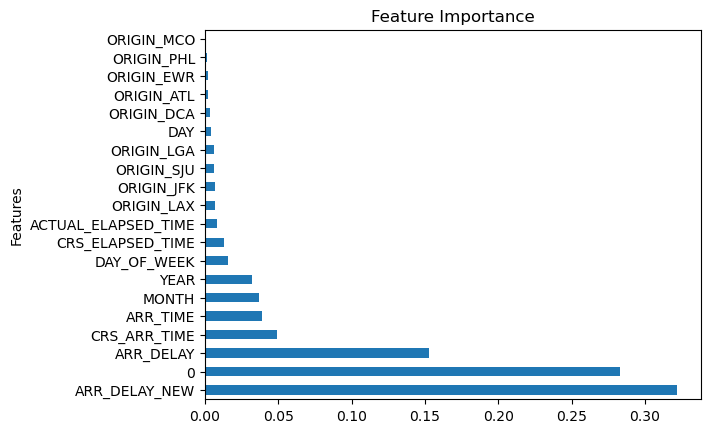

In [159]:
# Plot feature_scores
feature_score.nlargest(20).plot(title= 'Feature Importance', xlabel = 'Features', kind = 'barh', ylabel = 'Relative Importance' )

In [151]:
final_df = df_arr.drop(columns = 'ORIGIN_BNA')

In [160]:
final_df.to_csv(r'C:\data\final_arr_df.csv')